In [227]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import nltk
% matplotlib inline

In [100]:
Table_features = Table.read_table('features.csv')

In [101]:
Table_topics = Table.read_table('topics.csv')

In [102]:
Table_people = Table.read_table('people.csv')

In [103]:
Table_category = Table.read_table('doc_category.csv')

In [104]:
Table_pres = Table.read_table('pres.csv')

In [105]:
Table_ft = Table.read_table('features_to_topics.csv')

In [106]:
Table_fp = Table.read_table('features_to_people.csv')

In [107]:
Table_text = Table.read_table('text.csv')

In [108]:
Table_topics

ID,Topic
0,Holidays and special observances
1,Voluntarism
2,"Presidency, U.S"
3,Addresses and Remarks
4,Notices
5,Statements by the President
6,Supplementary Materials
7,Arizona
8,Civil rights
9,Connecticut


In [117]:
Table_pres

ID,PresidentName
0,Donald J. Trump
1,Barack H. Obama
2,George W. Bush
3,William J. Clinton
4,nan


In [109]:
Table_features

ID,PresidentID,Title,Notes,DocumentCategoryID,Month,Year
0,0,"Statement on National Mentoring Month, 2018",nan,0,1,2018
1,1,Message on the President's Farewell Address to the Nation,This message was released by the Office of the Press Sec ...,8,1,2017
2,2,"Remarks on Departure From Waco, Texas",The President spoke at 10:35 a.m. at Texas State Technic ...,1,1,2008
3,2,Eulogy at the National Funeral Service for Former Presid ...,The President spoke at 11:20 a.m. at the National Cathedral.,6,1,2007
4,2,Remarks to Reporters Following a Visit With United State ...,The President spoke at 12:05 p.m. at the Brooke Army Med ...,1,1,2006
5,2,The President's Radio Address,"The address was recorded at 8:20 a.m. on December 31, 20 ...",8,1,2005
6,2,Remarks on New Year's Day and an Exchange With Reporters ...,The President spoke at 2:32 p.m. at the Brooks County Ai ...,1,1,2004
7,2,Remarks During a Walking Tour of the Bush Ranch and an E ...,The President spoke at 8:51 a.m. at the Bush Ranch. In h ...,1,1,2003
8,2,Notice--Continuation of Libya Emergency,This notice was published in the Federal Register on Jan ...,6,1,2002
9,3,Statement on Judicial Vacancies,nan,0,1,2001


In [118]:
final_features = Table_features.where(1, are.not_equal_to(4)).where(4, are.not_equal_to(6))

In [119]:
feature_count = final_features.group(4).join('DocumentCategoryID', Table_category, 'ID').drop(0)

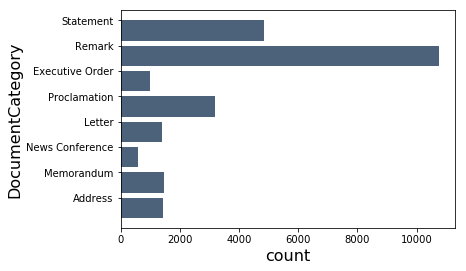

In [120]:
feature_count.barh('DocumentCategory')

In [125]:
final_pres = final_features.join('PresidentID', Table_pres, 'ID')

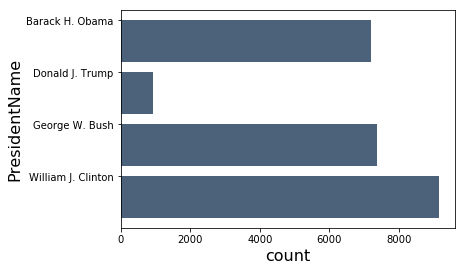

In [127]:
final_pres.group('PresidentName').barh('PresidentName')

In [130]:
final_topics = Table_ft.group('TopicID').join('TopicID', Table_topics, 'ID').drop(0)

In [145]:
sig_topics = final_topics.where(0, are.above(1000))

In [154]:
sig_topics.show()

count,Topic
1482,Holidays and special observances
4835,Addresses and Remarks
1894,Statements by the President
3189,Supplementary Materials
1450,Civil rights
2628,Employment and unemployment
3639,Energy
1223,Environment
3804,Health and medical care
2147,"Budget, Federal"


([<matplotlib.patches.Wedge at 0x24e9fb438>,
  <matplotlib.text.Text at 0x24ea71f60>])

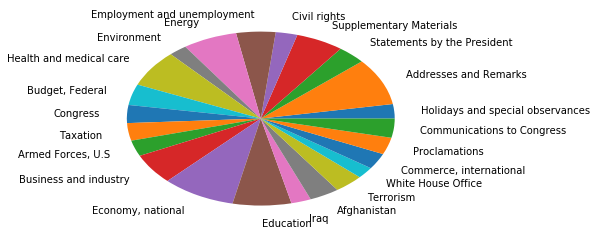

In [153]:
plt.pie(sig_topics.column(0), labels=sig_topics.column(1), labeldistance=1.2)

In [155]:
Table_topics.where(1, 'Employment and unemployment')

ID,Topic
10,Employment and unemployment


In [156]:
Table_ft.where(1, 10)

FeatureID,TopicID
12,10
23,10
12,10
27,10
45,10
45,10
12,10
51,10
51,10
51,10


In [160]:
pres_and_topics = Table_ft.join('TopicID', Table_topics, 'ID').join('FeatureID', final_pres, 'ID')

In [195]:
obama_and_topics = pres_and_topics.select('FeatureID', 'PresidentID', 'Topic', 'PresidentName', 'Year').where('PresidentID', 1)

In [208]:
grouped = obama_and_topics.groups(['Year', 'Topic']).where('count', are.above(500))

In [214]:
grouped.show()

Year,Topic,count
2009,"Economy, national",627
2009,Health and medical care,622
2010,Business and industry,783
2010,"Economy, national",980
2010,Education,719
2010,Employment and unemployment,580
2010,Energy,723
2010,Health and medical care,786
2011,"Economy, national",533
2012,Business and industry,525


In [217]:
clinton = final_features.where(1, 3)

In [256]:
new_clinton = clinton.join('ID', Table_text, 'FeaturesID')

In [257]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [258]:
vectorizer = TfidfVectorizer(min_df=1)

In [260]:
X = vectorizer.fit_transform(new_clinton.column(7))

In [261]:
idf = vectorizer.idf_
print (dict(zip(vectorizer.get_feature_names(), idf)))

{'00': 5.8635950773727545, '000': 2.0456385809836757, '000th': 8.5716452784749642, '006': 8.9771103865831279, '007': 8.5716452784749642, '009': 8.9771103865831279, '01': 6.2045216643433481, '010': 8.9771103865831279, '02': 5.8416161706539791, '021': 8.9771103865831279, '021083909': 8.5716452784749642, '03': 5.9566855004387662, '030': 8.9771103865831279, '032': 8.9771103865831279, '04': 5.9090574514495113, '040': 8.9771103865831279, '0409': 8.9771103865831279, '041': 8.9771103865831279, '043': 8.9771103865831279, '05': 4.8744670215463337, '050': 8.5716452784749642, '06': 3.572183284976834, '061': 8.9771103865831279, '063': 8.9771103865831279, '064': 8.9771103865831279, '065': 8.9771103865831279, '066': 8.9771103865831279, '07': 6.1737500056765935, '070': 8.9771103865831279, '0713': 8.9771103865831279, '072': 8.9771103865831279, '08': 5.6272062993085239, '080': 8.9771103865831279, '09': 6.1737500056765935, '090': 8.9771103865831279, '097': 8.9771103865831279, '10': 1.883290564528203, '10